In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os
import urllib.request

In [2]:
import subprocess

# Incidence de la varicelle

### Récupération des données

In [3]:
datalocal= "donnsentinellesvaricelle.csv"

URL des données tel que l'API le demande

In [4]:
data_url = "https://www.sentiweb.fr/api/v1/datasets/rest/incidence?indicator=7"

In [5]:
data_url = "https://www.sentiweb.fr/api/v1/datasets/rest/incidence?indicator=7&geo=PAY&span=all"

utilisation de CURL, n'utiliser qu'une fois

In [ ]:
%%bash
curl -o 'donnsentinellesvaricelle.csv' -H "Accept: text/csv" 'https://www.sentiweb.fr/api/v1/datasets/rest/incidence?indicator=7'

essais

In [ ]:
subprocess.call( ['echo', "\'$HOME\'"]  )

In [ ]:
subprocess.call(["curl", "-o", 'donnsentinellesvaricelle.csv', "-H", "Accept: text/csv", 'https://www.sentiweb.fr/api/v1/datasets/rest/incidence?indicator=7' ])


In [ ]:
#if not os.path.exists(datalocal):
 #   print("données téléchargées depuis le réseau Sentinelles")
 #   subprocess.call(
 #   curl -o 'donnsentinellesvaricelle.csv' -H "Accept: text/csv" 'https://www.sentiweb.fr/api/v1/datasets/rest/incidence?indicator=7'
 #   )
#else:
 #   print("déjà présent sur le serveur")    

### Prévisualisation des données

In [6]:
raw_data = pd.read_csv('donnsentinellesvaricelle.csv', skiprows=1)
raw_data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202413          7  21957    16138   27776      33          24         42   
1  202412          7  12898     9182   16614      19          13         25   
2  202411          7  15973    12400   19546      24          19         29   
3  202410          7  14301    10761   17841      21          16         26   
4  202409          7  14337    10871   17803      21          16         26   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

Il n'y a pas de données nulles de type Nan manquantes.

In [7]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [8]:
[type(i) for i in raw_data.iloc[0,:]]

[numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 str,
 str]

Tout les nombres sont de format numpy.int64, pas besoin de conversion.

Néanmoins le format de la semaine ne convient pas, j'utilise la fonction précédemment fournie lors de l'analyse du syndrome grippal.

In [9]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

Applications de la fonction, rajout d'une nouvelle colonne dans le tableau brut,
regard avec head()

In [12]:
raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]
raw_data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202413          7  21957    16138   27776      33          24         42   
1  202412          7  12898     9182   16614      19          13         25   
2  202411          7  15973    12400   19546      24          19         29   
3  202410          7  14301    10761   17841      21          16         26   
4  202409          7  14337    10871   17803      21          16         26   

  geo_insee geo_name                period  
0        FR   France 2024-03-25/2024-03-31  
1        FR   France 2024-03-18/2024-03-24  
2        FR   France 2024-03-11/2024-03-17  
3        FR   France 2024-03-04/2024-03-10  
4        FR   France 2024-02-26/2024-03-03

On trie les données suivant la période, avant on fixe l'index , trie puis crée une nouvelle variable. Ordre croissant.

In [13]:
sorted_data = raw_data.set_index('period').sort_index()

In [14]:
sorted_data.head()

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France  
1990-12-31/1991-01-06          18         36        FR   France

Comme l'exercice précédent, on vérifie la continuité des périodes

In [15]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Rien, donc OK.

### Visualisation

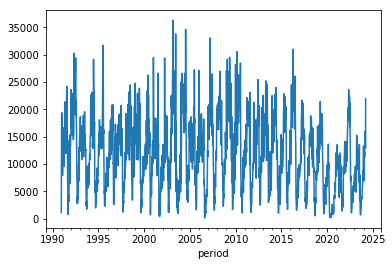

In [16]:
sorted_data['inc'].plot()

In [17]:
Très serré, prenons une partie récente.

SyntaxError: invalid syntax (<ipython-input-17-8d07a9158392>, line 1)

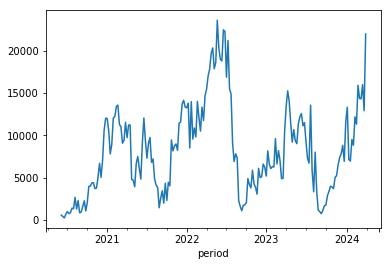

In [18]:
sorted_data['inc'][-200:].plot()

Bien mais les mois sont difficiles à distinguer, réduisons donc encore.

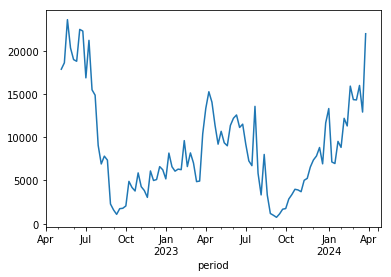

In [19]:
sorted_data['inc'][-100:].plot()

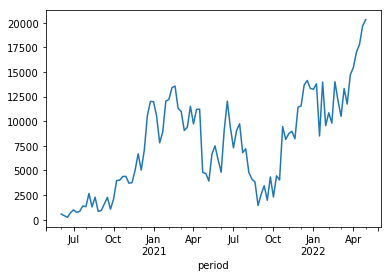

In [20]:
sorted_data['inc'][-200:-100].plot()

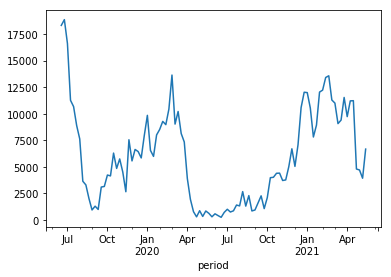

In [21]:
sorted_data['inc'][-250:-150].plot()

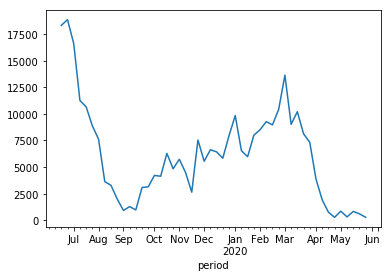

In [22]:
sorted_data['inc'][-250:-200].plot()

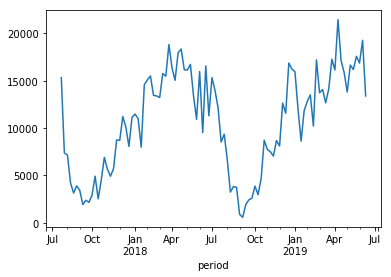

In [23]:
sorted_data['inc'][-350:-250].plot()

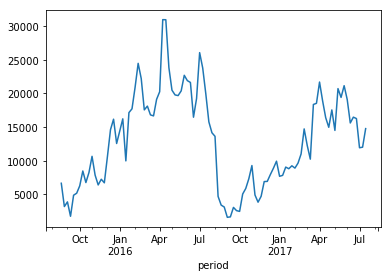

In [24]:
sorted_data['inc'][-450:-350].plot()

Il y a un pic épidémique au mois d'avril qui s'étale jusqu'à Juillet.
Le minimum a lieu au mois de Septembre

In [25]:
### Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er Septembre de l'année $N$ au
1er août de l'année $N+1$.
Le mois change par rapport au dernier exercice.

Il faut commencer par l'année 1991.

In [26]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [27]:
first_september_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code. On effectue la sommation des cas hebdomadaires.

In [32]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

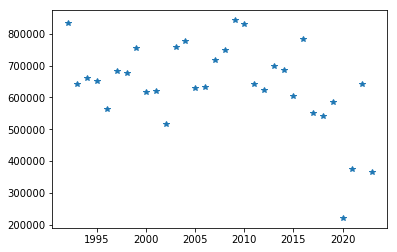

In [33]:
yearly_incidence.plot(style='*')

In [34]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Avec les données actuelles , 3 Avril 2023, l'épidémie la plus forte a lieu en 2009,
la plus faible en 2020.